In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [ ]:
batch_size = 20
train_data_dir = '/content/drive/MyDrive/BoneFractureDataset/training'
validation_data_dir = '/content/drive/MyDrive/BoneFractureDataset/testing'
train_generator = datagen.flow_from_directory( train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True )
validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 1141 images belonging to 2 classes.
Found 1 images belonging to 2 classes.


In [ ]:
!ls /kaggle/input/resnet50-weights/

ls: cannot access '/kaggle/input/resnet50-weights/': No such file or directory


In [ ]:
!stat /kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

stat: cannot statx '/kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5': No such file or directory


In [ ]:
!wget https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5 -P /kaggle/input/resnet50-weights/

--2024-03-02 06:27:07--  https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c06::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94765736 (90M) [application/octet-stream]
/kaggle/input/resnet50-weights: Read-only file system
/kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5: No such file or directory

Cannot write to ‘/kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5’ (Success).


In [ ]:
!cat /kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

cat: /kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5: No such file or directory


In [ ]:
!ls -l /kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

ls: cannot access '/kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5': No such file or directory


In [ ]:
!wget https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5 -P /kaggle/input/resnet50-weights

--2024-03-02 06:27:14--  https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c06::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94765736 (90M) [application/octet-stream]
/kaggle/input/resnet50-weights: Read-only file system
/kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5: No such file or directory

Cannot write to ‘/kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5’ (Success).


In [ ]:
resModel = Sequential()
resModel.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights=None,
    ))
resModel.add(Dense(1, activation='sigmoid'))
for layer in resModel.layers[0].layers[-50:]:
    layer.trainable = True

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
optimizer = Adam(learning_rate=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
resModel.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
epochs = 10
history = resModel.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=[reduce_lr])
evaluation = resModel.evaluate(train_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

Epoch 1/10
58/58 [==============================] - 771s 13s/step - loss: 0.1156 - accuracy: 0.9904 - val_loss: 3.4440 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/10
58/58 [==============================] - 733s 13s/step - loss: 0.0398 - accuracy: 0.9930 - val_loss: 1.0681 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/10
58/58 [==============================] - 726s 13s/step - loss: 0.0285 - accuracy: 0.9912 - val_loss: 1.5398 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/10
58/58 [==============================] - 727s 13s/step - loss: 0.0244 - accuracy: 0.9904 - val_loss: 0.6431 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/10
58/58 [==============================] - 727s 13s/step - loss: 0.0178 - accuracy: 0.9921 - val_loss: 7.1402 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/10
58/58 [==============================] - 729s 13s/step - loss: 0.0160 - accuracy: 0.9930 - val_loss: 0.1447 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/10
58/58 [==============================] - 73

In [ ]:
initial_epoch = 0
saved_history = {
    'loss': history.history['loss'],
    'accuracy': history.history['accuracy'],
    'val_loss': history.history['val_loss'],
    'val_accuracy': history.history['val_accuracy'],
}

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D
import numpy as np

In [ ]:
initial_epoch = 10
saved_history = {
    'loss': history.history['loss'],
    'accuracy': history.history['accuracy'],
    'val_loss': history.history['val_loss'],
    'val_accuracy': history.history['val_accuracy'],
}

In [ ]:
!ls /kaggle/working

ls: cannot access '/kaggle/working': No such file or directory


In [ ]:
!ls -l /kaggle/working/saved_D201history.npy

ls: cannot access '/kaggle/working/saved_D201history.npy': No such file or directory


In [ ]:
!find / -name saved_D201history.npy

find: ‘/proc/59/task/59/net’: Invalid argument
find: ‘/proc/59/net’: Invalid argument
find: ‘/proc/37519’: No such file or directory


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, jaccard_score
true_classes = [1, 0, 1, 1, 0]
predicted_classes = [1, 1, 0, 1, 0]
print(f"Accuracy: {accuracy_score(true_classes, predicted_classes)}")
print(f"Precision: {precision_score(true_classes, predicted_classes)}")
print(f"Recall: {recall_score(true_classes, predicted_classes)}")
print(f"F1 Score: {f1_score(true_classes, predicted_classes)}")
print(f"Log Loss: {log_loss(true_classes, predicted_classes)}")
print(f"Jaccard Score: {jaccard_score(true_classes, predicted_classes)}")

Accuracy: 0.6
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666
Log Loss: 14.41746135564686
Jaccard Score: 0.5


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes,digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.5000    0.5000    0.5000         2
           1     0.6667    0.6667    0.6667         3

    accuracy                         0.6000         5
   macro avg     0.5833    0.5833    0.5833         5
weighted avg     0.6000    0.6000    0.6000         5



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [ ]:
def save_and_display_gradcam(img_path, heatmap, alpha=0.7):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (299, 299))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_PLASMA)
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('GradCAM', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    model.layers[-1].activation = None
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
import cv2

In [ ]:
abcd = cv2.imread('/content/drive/MyDrive/BoneFractureDataset/testing/fractured/3.jpg')

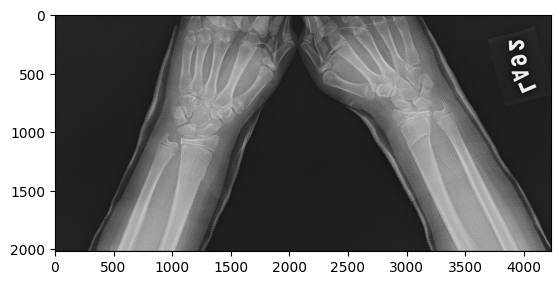

In [ ]:
plt.imshow(abcd)